In [1]:
import io
import numpy as np
from sklearn.manifold import TSNE

In [2]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [3]:
src_path = 'vectors/vectors-en.txt'
tgt_path = 'vectors/vectors-nl.txt'
nmax = 200000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

In [4]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    word_list = [tgt_id2word[word] for word in k_best]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))
    return word_list

In [5]:
# printing nearest neighbors in the source space
src_word = 'atherosclerosis'
src_neighbors = get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=5)

Nearest neighbors of "atherosclerosis":
1.0000 - atherosclerosis
0.9137 - atherosclerotic
0.8565 - arteriosclerosis
0.8292 - hypertension
0.7882 - hypercholesterolemia


In [6]:
# printing nearest neighbors in the target space
tgt_neighbors = get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=5)

Nearest neighbors of "atherosclerosis":
0.7027 - trombocytopenie
0.6889 - vaatziekten
0.6880 - cardiovasculaire
0.6848 - longaandoening
0.6836 - stofwisselingsziekten


In [ ]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=2, whiten=True)  
tsne = TSNE(n_components=2, n_iter=3000, verbose=2)
tsne.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % tsne.explained_variance_ratio_.sum())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400000 samples in 0.188s...
[t-SNE] Computed neighbors for 400000 samples in 4685.319s...
[t-SNE] Computed conditional probabilities for sample 1000 / 400000
[t-SNE] Computed conditional probabilities for sample 2000 / 400000
[t-SNE] Computed conditional probabilities for sample 3000 / 400000
[t-SNE] Computed conditional probabilities for sample 4000 / 400000
[t-SNE] Computed conditional probabilities for sample 5000 / 400000
[t-SNE] Computed conditional probabilities for sample 6000 / 400000
[t-SNE] Computed conditional probabilities for sample 7000 / 400000
[t-SNE] Computed conditional probabilities for sample 8000 / 400000
[t-SNE] Computed conditional probabilities for sample 9000 / 400000
[t-SNE] Computed conditional probabilities for sample 10000 / 400000
[t-SNE] Computed conditional probabilities for sample 11000 / 400000
[t-SNE] Computed conditional probabilities for sample 12000 / 400000
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 123000 / 400000
[t-SNE] Computed conditional probabilities for sample 124000 / 400000
[t-SNE] Computed conditional probabilities for sample 125000 / 400000
[t-SNE] Computed conditional probabilities for sample 126000 / 400000
[t-SNE] Computed conditional probabilities for sample 127000 / 400000
[t-SNE] Computed conditional probabilities for sample 128000 / 400000
[t-SNE] Computed conditional probabilities for sample 129000 / 400000
[t-SNE] Computed conditional probabilities for sample 130000 / 400000
[t-SNE] Computed conditional probabilities for sample 131000 / 400000
[t-SNE] Computed conditional probabilities for sample 132000 / 400000
[t-SNE] Computed conditional probabilities for sample 133000 / 400000
[t-SNE] Computed conditional probabilities for sample 134000 / 400000
[t-SNE] Computed conditional probabilities for sample 135000 / 400000
[t-SNE] Computed conditional probabilities for sample 136000 / 400000
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 242000 / 400000
[t-SNE] Computed conditional probabilities for sample 243000 / 400000
[t-SNE] Computed conditional probabilities for sample 244000 / 400000
[t-SNE] Computed conditional probabilities for sample 245000 / 400000
[t-SNE] Computed conditional probabilities for sample 246000 / 400000
[t-SNE] Computed conditional probabilities for sample 247000 / 400000
[t-SNE] Computed conditional probabilities for sample 248000 / 400000
[t-SNE] Computed conditional probabilities for sample 249000 / 400000
[t-SNE] Computed conditional probabilities for sample 250000 / 400000
[t-SNE] Computed conditional probabilities for sample 251000 / 400000
[t-SNE] Computed conditional probabilities for sample 252000 / 400000
[t-SNE] Computed conditional probabilities for sample 253000 / 400000
[t-SNE] Computed conditional probabilities for sample 254000 / 400000
[t-SNE] Computed conditional probabilities for sample 255000 / 400000
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 361000 / 400000
[t-SNE] Computed conditional probabilities for sample 362000 / 400000
[t-SNE] Computed conditional probabilities for sample 363000 / 400000
[t-SNE] Computed conditional probabilities for sample 364000 / 400000
[t-SNE] Computed conditional probabilities for sample 365000 / 400000
[t-SNE] Computed conditional probabilities for sample 366000 / 400000
[t-SNE] Computed conditional probabilities for sample 367000 / 400000
[t-SNE] Computed conditional probabilities for sample 368000 / 400000
[t-SNE] Computed conditional probabilities for sample 369000 / 400000
[t-SNE] Computed conditional probabilities for sample 370000 / 400000
[t-SNE] Computed conditional probabilities for sample 371000 / 400000
[t-SNE] Computed conditional probabilities for sample 372000 / 400000
[t-SNE] Computed conditional probabilities for sample 373000 / 400000
[t-SNE] Computed conditional probabilities for sample 374000 / 400000
[t-SNE] Computed con

In [34]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for sw in src_words:
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(sw)
    for tw in tgt_words:
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(tw)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

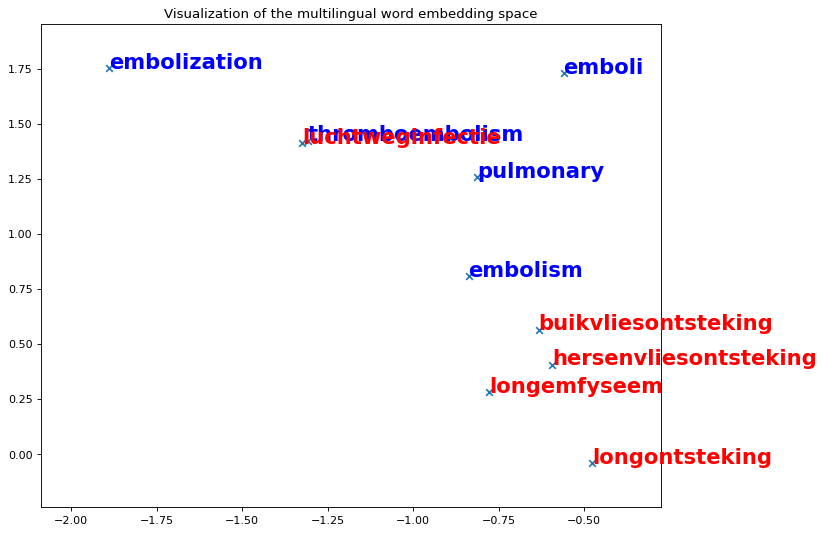

In [40]:
# get 5 random input words
# src_words = ['atherosclerosis', 'atherosclerotic', 'arteriosclerosis', 'hypertension', 'hypercholesterolemia']
# tgt_words = ['trombocytopenie', 'vaatziekten', 'trombose', 'longaandoening',  'stofwisselingsziekten', 'atherosclerose','hypertensie']
src_words = src_neighbors
tgt_words = tgt_neighbors

# assert words in dictionaries
for sw in src_words:
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words:
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)